## LAB 10 ##

1. Use logistic regression to predict whether it will rain tomorrow based on today’s weather conditions. Perform necessary data preprocessing such as handling missing values and normalization. Split the dataset into training and testing sets. Train the model and evaluate its performance using accuracy, precision, recall, and F1-score. Finally, plot and interpret the confusion matrix.

DATASET -> Dataset: https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("archive/weather_forecast_data.csv")
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [2]:
df['Rain']=df['Rain'].map({'rain': 1, 'no rain': 0})
df.dropna(inplace=True)

X =df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].values
y =df['Rain'].values.reshape(-1, 1)

#normalization
X_mean=np.mean(X, axis=0)
X_std=np.std(X, axis=0)
X=(X - X_mean) / X_std

def train_test_split(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    split_idx=int(len(X) * test_size)
    test_idx=indices[:split_idx]
    train_idx=indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train, X_test, y_train, y_test)


[[-1.7172657   0.69694397 -0.85227156 -0.67901423  0.95726173]
 [ 1.57306263 -1.5790241  -0.46712377  1.52807531  0.67744116]
 [-1.00220137  0.88540581  0.13660376 -0.99405545  1.5808803 ]
 ...
 [-1.71047119 -1.6928265  -0.06726471  0.16459205 -0.82616313]
 [-1.6329873  -1.5807048   1.21449017  1.01201548 -0.12666412]
 [ 1.48060273  1.34005204 -1.27185749  0.20677655  1.63696355]] [[ 0.70227608 -1.58608092  1.45180596 -0.93657088 -0.28778275]
 [-0.21122997 -0.87234933  0.96284022  0.21834078  1.29304248]
 [ 0.02714063  0.29695002 -1.70800035  0.01425071  0.40492142]
 ...
 [-0.48146665  1.04677293  0.17112218  1.52881485  1.65427826]
 [ 0.21613603  0.15256706  1.03750446  1.13169251  1.49690072]
 [ 0.0846796   0.23295518 -0.57063736  0.05814539  1.57064696]] [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]] [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 

In [3]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Loss function
def compute_loss(y, y_pred):
    eps = 1e-10  # to avoid log(0)
    return -np.mean(y*np.log(y_pred+eps)+(1-y)*np.log(1-y_pred+eps))

def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    bias = 0
    for epoch in range(epochs):
        linear_output = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_output)
        dw = np.dot(X.T, (y_pred - y))/n_samples
        db = np.mean(y_pred - y)
        weights -= lr * dw
        bias -= lr * db
        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch} — Loss: {loss:.4f}")
    return weights, bias

# Training the model
weights, bias = train_logistic_regression(X_train, y_train)

Epoch 0 — Loss: 0.6931
Epoch 100 — Loss: 0.2720
Epoch 200 — Loss: 0.2217
Epoch 300 — Loss: 0.2006
Epoch 400 — Loss: 0.1887
Epoch 500 — Loss: 0.1810
Epoch 600 — Loss: 0.1756
Epoch 700 — Loss: 0.1716
Epoch 800 — Loss: 0.1685
Epoch 900 — Loss: 0.1661


In [4]:
# Predicting the function
def predict(X, weights, bias):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= 0.5).astype(int)
y_pred = predict(X_test, weights, bias)

def evaluation_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    return np.array([[TN, FP], [FN, TP]])

confusion_matrix= evaluation_metrics(y_test, y_pred)

Accuracy:  0.9280
Precision: 0.7234
Recall:    0.5965
F1 Score:  0.6538


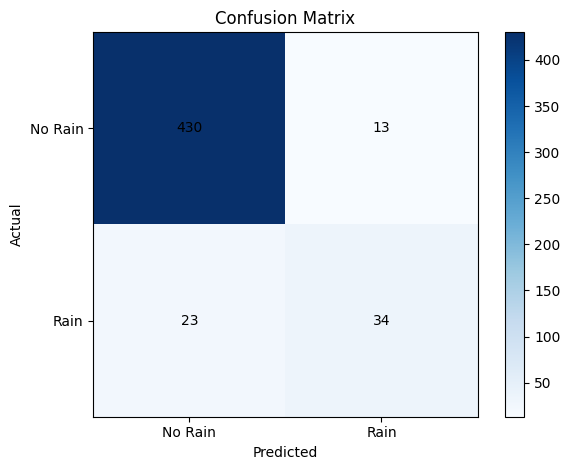

In [5]:
def plot_confusion_matrix(cm, labels=["No Rain", "Rain"]):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Axis labels
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")

    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(confusion_matrix)


2. In this lab, you will compute normals for each point in a given 3D point cloud using Principal Component Analysis (PCA). You'll explore how PCA can effectively capture local geometric structures and help derive surface normals by analyzing neighboring points.

Context:

A point cloud is a collection of discrete data points representing the external surface of an object or scene in 3D space. The k-Nearest Neighbors (k-NN) algorithm identifies the closest points to a query point by measuring the distance (usually Euclidean distance) and selecting the nearest points. Normals in point clouds are essential for many geometric processing applications such as rendering, registration, segmentation, and feature detection.



Implement the normal computation with PCA using libraries such as NumPy for PCA computation and scipy for finding neighborhoods using KNN. Visualize the resulting point cloud with normals.

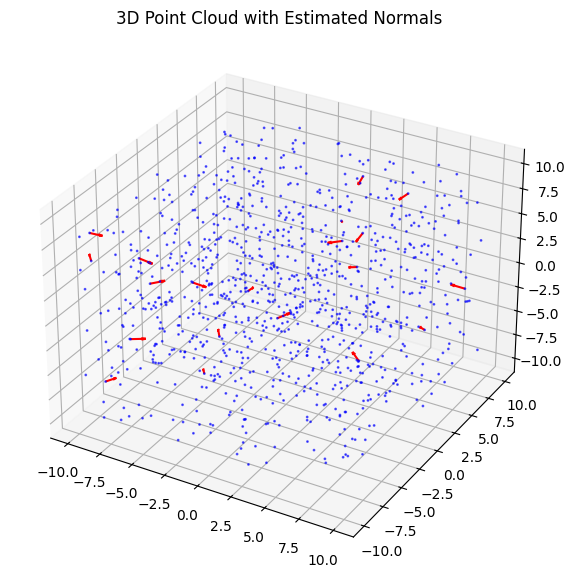

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_point_cloud(num_points=1000, spread=10):
    np.random.seed(42)
    x = np.random.uniform(-spread, spread, num_points)
    y = np.random.uniform(-spread, spread, num_points)
    z = np.random.uniform(-spread, spread, num_points)
    return np.stack((x, y, z), axis=-1)

def find_neighbors(point_cloud, k):
    n = len(point_cloud)
    neighbors = np.zeros((n, k), dtype=int)
    for i in range(n):
        distances = np.linalg.norm(point_cloud - point_cloud[i], axis=1)
        nearest = np.argsort(distances)[1:k+1]  # Exclude self (distance 0)
        neighbors[i] = nearest
    return neighbors

def compute_normals(point_cloud, neighbor_indices):
    normals = np.zeros_like(point_cloud)
    for i in range(len(point_cloud)):
        neighbors = point_cloud[neighbor_indices[i]]
        centroid = np.mean(neighbors, axis=0)
        centered = neighbors - centroid
        cov = np.cov(centered.T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        normal = eigvecs[:, np.argmin(eigvals)]
        if np.dot(normal, point_cloud[i]) > 0:
            normal = -normal
        normals[i] = normal
    return normals


points = generate_point_cloud()
neighbor_indices = find_neighbors(points, k=20)
normals = compute_normals(points, neighbor_indices)

# Visualizing
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.6, c='blue')

stride = 50
for i in range(0, len(points), stride):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normals[i, 0], normals[i, 1], normals[i, 2],
              length=1.0, color='red')

ax.set_title("3D Point Cloud with Estimated Normals")
plt.show()


3 .Create  geometric shapes like circle, ellipse, rectangle, square, star. Extract features from them( features may be your choice) and use SVM for shape classification.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_image(shape, size=100):
    img = np.zeros((size, size), dtype=np.uint8)
    yy, xx = np.mgrid[:size, :size]

    if shape == "circle":
        mask = (xx - size//2)**2 + (yy - size//2)**2 <= (size//3)**2
    elif shape == "square":
        mask = (np.abs(xx - size//2) < size//4) & (np.abs(yy - size//2) < size//4)
    elif shape == "rectangle":
        mask = (np.abs(xx - size//2) < size//4) & (np.abs(yy - size//2) < size//6)
    elif shape == "ellipse":
        mask = (((xx - size//2) / (size/3))**2 + ((yy - size//2) / (size/4))**2) <= 1
    elif shape == "star":
        mask = ((np.abs(xx - size//2) < size//20) & (yy > size//3) & (yy < 2*size//3)) | \
               ((np.abs(yy - size//2) < size//20) & (xx > size//3) & (xx < 2*size//3))
    else:
        mask = np.zeros_like(img)

    img[mask] = 1
    return img

def extract_features(img):
    coords = np.argwhere(img)
    if coords.size == 0:
        return [0]*7

    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    height = y_max - y_min + 1
    width = x_max - x_min + 1

    area = img.sum()
    aspect_ratio = width / height
    perimeter_estimate = 2 * (width + height)
    compactness = perimeter_estimate**2 / area if area > 0 else 0
    circularity = (4 * np.pi * area) / (perimeter_estimate**2) if perimeter_estimate > 0 else 0
    elongation = min(width, height) / max(width, height)

    return [area, aspect_ratio, width, height, compactness, circularity, elongation]


shapes = ['circle', 'square', 'rectangle', 'ellipse', 'star']
X = []
y = []

for label, shape in enumerate(shapes):
    for _ in range(100):
        img = generate_image(shape)
        feat = extract_features(img)
        X.append(feat)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Manual normalization
means = X.mean(axis=0)
stds = X.std(axis=0) + 1e-8  # avoid division by zero
X = (X - means) / stds

# Adding bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Train-test splitting
indices = np.random.permutation(len(X))
train_idx, test_idx = indices[:400], indices[400:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# SVM training
def train_linear_svm(X, y, num_classes, epochs=3000, lr=0.01, reg=0.001):
    W = np.random.randn(num_classes, X.shape[1]) * 0.01  # small random init

    for epoch in range(epochs):
        for i in range(len(X)):
            xi = X[i]
            yi = y[i]
            for c in range(num_classes):
                y_true = 1 if c == yi else -1
                margin = y_true * (W[c] @ xi)
                if margin < 1:
                    W[c] += lr * (y_true * xi - reg * W[c])
                else:
                    W[c] -= lr * reg * W[c]
    return W

def predict(X, W):
    scores = X @ W.T
    return np.argmax(scores, axis=1)

W = train_linear_svm(X_train, y_train, num_classes=5, epochs=3000, lr=0.001, reg=0.0001)
y_pred = predict(X_test, W)

accuracy = np.mean(y_pred == y_test)
print(f"Linear SVM Accuracy: {accuracy * 100:.2f}%")



Linear SVM Accuracy: 100.00%


In [1]:
for i in range(5):
    img = generate_image(shapes[i])
    feat = extract_features(img)
    feat = np.append(feat, 1)  # add bias
    pred = predict(np.array([feat]), W)[0]
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {shapes[i]}, Predicted: {shapes[pred]}")
    plt.axis('off')
    plt.show()


NameError: name 'generate_image' is not defined